# Logistic Regression

In [ ]:
## https://matters.news/@CHWang/machine-learning-%E7%B5%A6%E8%87%AA%E5%B7%B1%E7%9A%84%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-logistic-regression-%E9%82%8F%E8%BC%AF%E8%BF%B4%E6%AD%B8-%E4%BA%8C%E5%85%83%E5%88%86%E9%A1%9E%E5%95%8F%E9%A1%8C-scikit-learn-sklearn-%E5%AF%A6%E4%BD%9C%E6%95%99%E5%AD%B8-bafyreibafnjfn2iitip336ij35xq7ea3l5bhhr3q2n5qd6xlx4qr6pq33i

## Step 1: 導入所需的套件

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn

In [1]:
## 導入Python的數據處理套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   ## 導入視覺化套件
from sklearn import linear_model   ## 導入Sklearn中的線性模組
from sklearn.model_selection import train_test_split   ## 將數據集分成訓練集與測試集的套件

## Step 2: 導入數據集

In [3]:
## 導入數據集
data = pd.read_csv('https://raw.githubusercontent.com/LiShingHan/DataScience/main/DataSet/p7.11.csv')

## 顯示數據集
data

,Hours,Pass
0,4.0,1
1,3.7,1
2,2.0,0
3,3.0,0
4,1.0,0
5,1.0,0
6,3.2,1
7,3.8,1
8,4.0,1
9,3.9,1


## Step 3: 定義自變量與應變量

In [4]:
## 定義自變量與應變量
X = data['Hours'].values
y = data['Pass'].values

print('Independent Variable: ', X)
print('Dependent Variable: ', y)

Independent Variable:  [4.  3.7 2.  3.  1.  1.  3.2 3.8 4.  3.9 1.  2.9 2.9 2.  3.2 3.3 3.  3.
 2.8 0.  0.5 0.8 0.9 1.2 1.5 2.5 2.7 2.4 2.1 3.5 3.6 3.1 1.7 2.3 0.1 3.2
 3.3]
Dependent Variable:  [1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1]


## Step 4: 將特徵向量轉為2D向量

In [5]:
## 由於 Sklearn 能接受的特徵格式為 (n_samples, n_features)，所以使用 reshape 將特徵資料轉為2D向量，這樣 Sklearn 才能使用，一般狀況下，一維特徵才需要轉換
print('Original X shape: ', X.shape)

## reshape用法: -1代表自動配置幾個框框(程式會自行根據有幾個值配置幾個框框架，也就是拿總共的數量除以後面設定框框內有幾個值)
## 轉為2D向量
X = X.reshape(-1, 1)

print('After reshaping data to 2D vector : ', X.shape)

Original X shape:  (37,)
After reshaping data to 2D vector :  (37, 1)


## Step 5: 將數據集分成訓練集與測試集

In [6]:
## 將數據集分成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Step 6: 建立邏輯迴歸模型 Logistic Regression Model 與訓練模型

In [7]:
## 建立邏輯迴歸模型
model = linear_model.LogisticRegression()

## 擬和數據
model.fit(X_train, y_train)

LogisticRegression()

## Step 7: 檢視模型係數與截距 Coeficient & Interception

In [8]:
## 查看建出來的模型係數與截距 y = w1x + w0
w1 = float(model.coef_)
w0 = float(model.intercept_)

print('Coeficient: ', w1)
print('Interception: ', w0)

Coeficient:  2.026188428249366
Interception:  -5.634017443606029


## Step 8: Sigmoid - 套入轉換函數 (將Logit(Odds)值轉換成 -> 0~1之間的數值)

In [9]:
## 套用 Sigmoid轉換函數，將值轉換成介於0~1 之間的值(機率)
def sigmoid(x, w0, w1):
    logit_odds = w0 + w1 * x
    return 1 / (1 + np.exp(-logit_odds))

## Step 9: 視覺化轉換結果圖

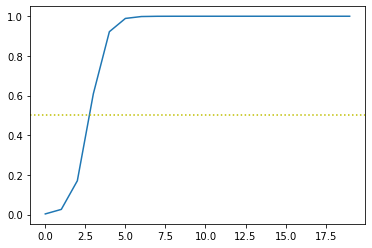

In [10]:
## 視覺化後Sigmoid圖
x = np.arange(0, 20, 1)
result = sigmoid(x, w0, w1)

plt.plot(x, result)

## 畫出50%的機率線
plt.axhline(y = 0.5, ls = 'dotted', color = 'y')

## Step 10: 預測測試集

In [11]:
## 預測測試集
prediction = model.predict(X_test)

print('Real Result: ', y_test)
print('Model Predict: ', prediction)




Real Result:  [0 0 0 1 0 1 1 1]
Model Predict:  [1 0 0 1 0 1 1 1]


## Step 11: 模型預測測試集中每筆數據為0或1的機率

In [12]:
## 預測測試集為1或0的機率
proba = model.predict_proba(X_test)
print('Probability (0 or 1)', proba)

Probability (0 or 1) [[0.39065784 0.60934216]
 [0.97360495 0.02639505]
 [0.98224314 0.01775686]
 [0.15972698 0.84027302]
 [0.82943674 0.17056326]
 [0.07793531 0.92206469]
 [0.29947785 0.70052215]
 [0.13436775 0.86563225]]


##  Step 12: 模型表現 - 準確度 Accuracy

In [13]:
## 模型表現
score = model.score(X_test, y_test)
print('Accuracy :' + str(score * 100) + '%')

Accuracy :87.5%


In [14]:
## 預測自行定義的數據集
result = model.predict([[1], [2], [2.5], [3], [3.5], [4], [5], [6]])

print('Define your own data and predict: ', result)

Define your own data and predict:  [0 0 0 1 1 1 1 1]
